In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)


In [3]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,566.44,566.44,551.41,556.93,"13,100"
2014-03-28,559.66,564.88,557.14,558.46,"41,200"
2014-03-31,565.34,565.45,555.41,555.45,"10,800"
2014-04-01,557.18,566.89,557.18,565.61,"7,900"
2014-04-02,598.35,603.17,560.65,565.45,"147,100"


In [4]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 698 entries, 2014-03-27 to 2016-12-30
Data columns (total 5 columns):
Open      698 non-null float64
High      698 non-null float64
Low       698 non-null float64
Close     698 non-null float64
Volume    698 non-null object
dtypes: float64(4), object(1)
memory usage: 32.7+ KB


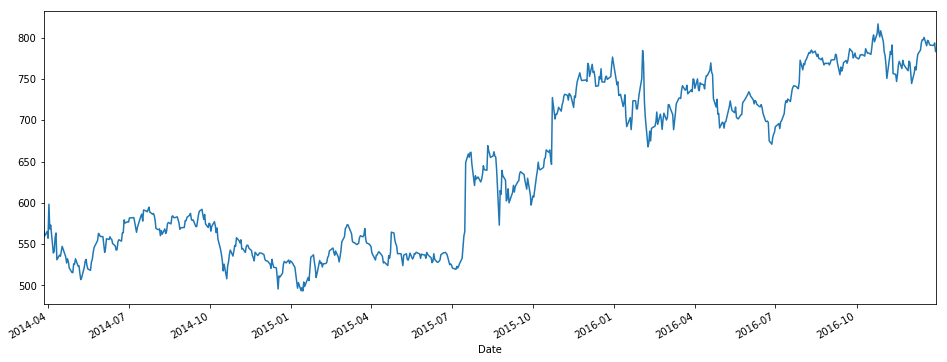

In [6]:
dataset['Open'].plot(figsize=(16,6))

In [7]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [8]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-27,NaN,NaN,NaN,NaN,NaN
2014-03-28,NaN,NaN,NaN,NaN,NaN
2014-03-31,NaN,NaN,NaN,NaN,NaN
2014-04-01,NaN,NaN,NaN,NaN,NaN
2014-04-02,NaN,NaN,NaN,NaN,NaN
2014-04-03,NaN,NaN,NaN,NaN,NaN
2014-04-04,569.762857,575.527143,555.127143,558.818571,1.669786e+06
2014-04-07,565.880000,572.747143,551.455714,555.925714,2.296714e+06
2014-04-08,563.230000,571.118571,549.025714,555.200000,2.741000e+06


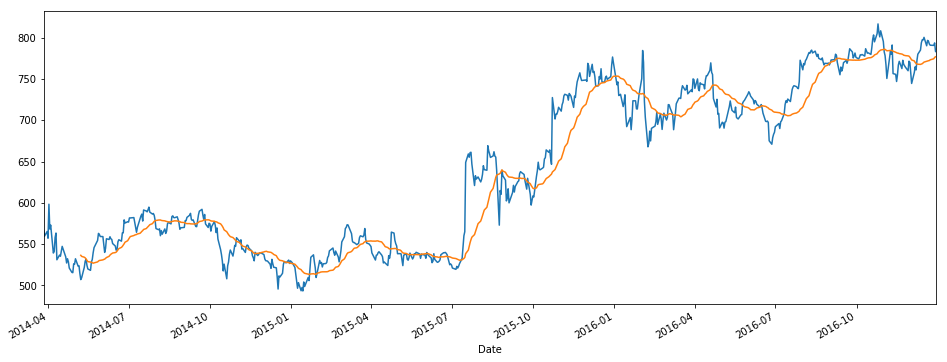

In [9]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

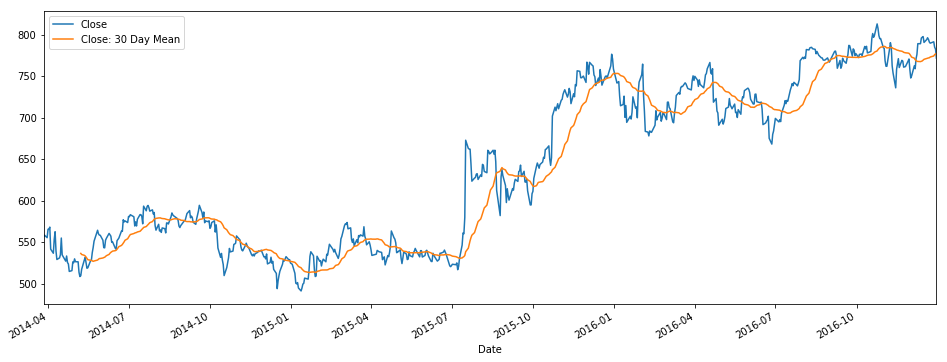

In [10]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

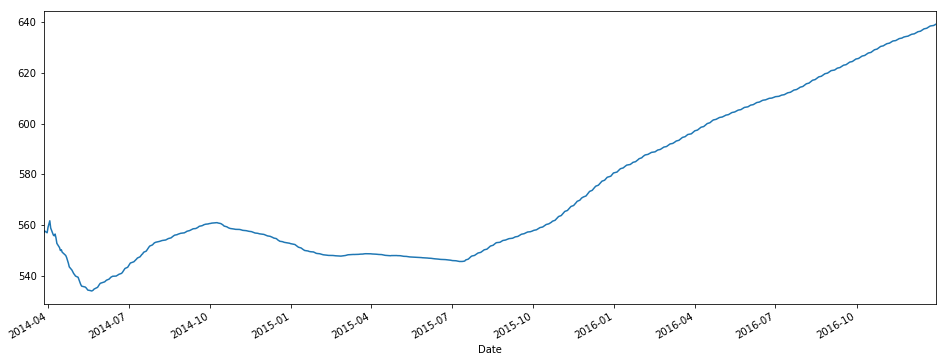

In [11]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [12]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [13]:
training_set

,Open
Date,
2014-03-27,566.44
2014-03-28,559.66
2014-03-31,565.34
2014-04-01,557.18
2014-04-02,598.35
2014-04-03,568.29
2014-04-04,573.08
2014-04-07,539.26
2014-04-08,541.11


In [14]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 698):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
X_train[59]

array([0.19181768, 0.1865607 , 0.217515  , 0.21773146, 0.26628116,
       0.25449935, 0.25907601, 0.25802462, 0.27351722, 0.27351722,
       0.27478508, 0.25598367, 0.23724411, 0.21974148, 0.23823366,
       0.27119797, 0.28090791, 0.28786567, 0.26173542, 0.30329643,
       0.29943101, 0.2962459 , 0.30400767, 0.31393407, 0.29525635,
       0.28808213, 0.29018492, 0.28338178, 0.26504422, 0.23359515,
       0.22938957, 0.23251283, 0.20700105, 0.22617354, 0.21250541,
       0.23232729, 0.21544313, 0.22407075, 0.25140701, 0.25660214,
       0.25119055, 0.27861958, 0.28134084, 0.27497062, 0.27425939,
       0.27775373, 0.26708516, 0.25477766, 0.23099759, 0.23647102,
       0.23804812, 0.26318882, 0.26318882, 0.2754654 , 0.2835364 ,
       0.29064877, 0.26782732, 0.26430206, 0.26628116, 0.24141876])

In [ ]:
y_train[61]

In [18]:
X_train[6]

array([0.24670666, 0.14212382, 0.14784464, 0.20035253, 0.21692745,
       0.11685942, 0.13445482, 0.13003278, 0.14908158, 0.16701713,
       0.1278063 , 0.10479931, 0.12069392, 0.10922135, 0.08590513,
       0.06945389, 0.06858804, 0.1016142 , 0.10009895, 0.12060115,
       0.0930175 , 0.09428536, 0.06518647, 0.04258148, 0.04963201,
       0.08899746, 0.11175707, 0.11825097, 0.09573876, 0.08244171,
       0.07724658, 0.10820088, 0.11794174, 0.14332983, 0.16222401,
       0.18918919, 0.21559775, 0.21185602, 0.20397056, 0.20366133,
       0.1737275 , 0.14447399, 0.1595646 , 0.19552848, 0.19271445,
       0.20310471, 0.19534294, 0.1931783 , 0.17765477, 0.16840868,
       0.15279238, 0.15483332, 0.18374668, 0.19181768, 0.1865607 ,
       0.217515  , 0.21773146, 0.26628116, 0.25449935, 0.25907601])

In [19]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



Using TensorFlow backend.


In [21]:
# Initialising the RNN
regressor = Sequential()



In [22]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [23]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)


Epoch 1/100
638/638 [==============================] - 47s 73ms/step - loss: 0.0446
Epoch 2/100
638/638 [==============================] - 33s 52ms/step - loss: 0.0116
Epoch 3/100
638/638 [==============================] - 33s 52ms/step - loss: 0.0106
Epoch 4/100
638/638 [==============================] - 32s 50ms/step - loss: 0.0119
Epoch 5/100
638/638 [==============================] - 32s 50ms/step - loss: 0.0090
Epoch 6/100
638/638 [==============================] - 32s 50ms/step - loss: 0.0098
Epoch 7/100
638/638 [==============================] - 32s 50ms/step - loss: 0.0088
Epoch 8/100
638/638 [==============================] - 32s 51ms/step - loss: 0.0088
Epoch 9/100
638/638 [==============================] - 32s 50ms/step - loss: 0.0078
Epoch 10/100
638/638 [==============================] - 32s 50ms/step - loss: 0.0080
Epoch 11/100
638/638 [==============================] - 32s 50ms/step - loss: 0.0075
Epoch 12/100
638/638 [==============================] - 32s 51ms/step - lo

KeyboardInterrupt: 

In [24]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)



In [25]:
real_stock_price = dataset_test.iloc[:, 0:1].values

In [26]:
dataset_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [27]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null object
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [28]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [29]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [30]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
Open    20 non-null float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [31]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(training_set_scaled[i, 0])    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [32]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null float32
dtypes: float32(1)
memory usage: 160.0 bytes


In [33]:
predicted_stock_price

,0
0,779.367310
1,777.688721
2,776.464600
3,775.865784
4,776.347473
5,778.412659
6,781.732117
7,785.341003
8,788.606445
9,791.172546


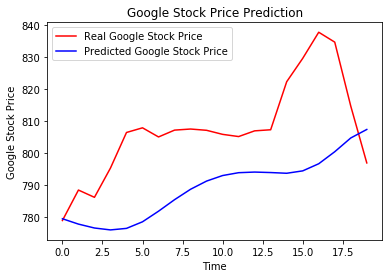

In [35]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [36]:
scores=regressor.evaluate(X_test,y_test)

20/20 [==============================] - 2s 89ms/step


In [40]:
print("%s: %.2f%%" % (regressor.metrics_names[0], scores*100))

loss: 43.36%


In [38]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________